<a href="https://colab.research.google.com/github/mkierczak/autoencoders_workshop/blob/main/PCA_MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import math
import numpy as np

a = 0
b = 1
theta = range(0, 360+180, 10)
Theta = np.deg2rad(theta)
r = a + b * Theta

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

data = pol2cart(r, Theta)

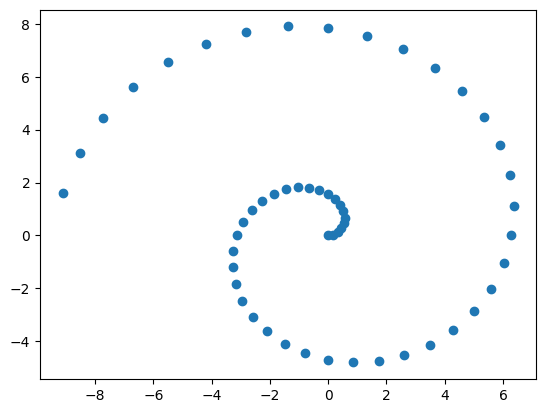

In [3]:
import matplotlib.pyplot as plt
# Creating a numpy array
arrX = np.array(data[0])
arrY = np.array(data[1])
# Plotting point using sactter method
plt.scatter(arrX, arrY)
plt.show()

In [12]:
rangeZ = np.arange(0, 100, 10)
Z = np.repeat(rangeZ, arrX.shape, axis=0)
X = np.tile(arrX, rangeZ.shape)
Y = np.tile(arrY, rangeZ.shape)
#Z.shape

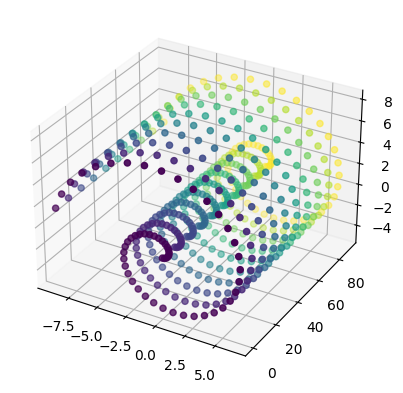

In [44]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

#create 3d axes
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter(X, Z, Y, c=Z)
plt.show()

In [28]:
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
manifold = np.stack((X, Y, Z), axis = -1)
manifold_scaled = scaler.fit_transform(manifold)
embedding = MDS(n_components=2, normalized_stress='auto')
manifold_transformed = embedding.fit_transform(manifold_scaled)

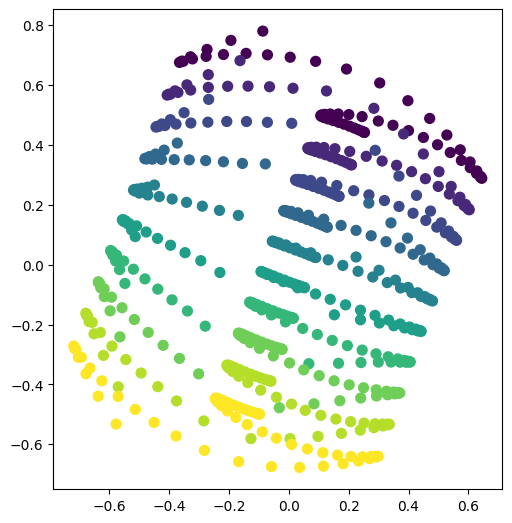

In [40]:
ax = plt.axes([0,0,1,1])
ax.set_aspect(aspect='equal')
plt.scatter(manifold_transformed[:,0], manifold_transformed[:,1], c=Z, s=50)
plt.show()

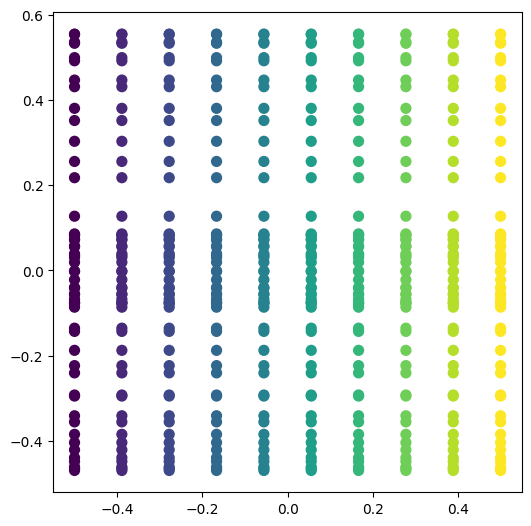

In [38]:
from sklearn.decomposition import PCA
embedding = PCA(n_components=2)
pca_embedding = embedding.fit_transform(manifold_scaled)

ax = plt.axes([0,0,1,1])
ax.set_aspect(aspect='equal')
plt.scatter(pca_embedding[:,0], pca_embedding[:,1], c=Z, s=50)
plt.show()